In [233]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from pprint import pprint
import _pickle as pickle

import time

In [234]:
# My libraries
import sim_ann as sa
import model

In [235]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Perform simulated annealing.

Change the values for min and max temperature and alpha in the file sim_ann.py. 

t0 = time.time()
parameters, cost_hist, parameters_hist = sa.parameter_tuning()
t1 = time.time()
total = t1-t0
print('Total time spent: ', total)

plt.plot(cost_hist)

## Dumping the simulated annealing results

with open('pickle/parameters.txt', 'wb') as fp:
    pickle.dump(parameters, fp)

with open('pickle/cost_hist.txt', 'wb') as fp:
    pickle.dump(cost_hist, fp)

with open('pickle/parameters_hist.txt', 'wb') as fp:
    pickle.dump(parameters_hist, fp)
    

## Loading simulated annealing results

In [ ]:
with open ('pickle/parameters.txt', 'rb') as fp:
    parameters = pickle.load(fp)

with open ('pickle/cost_hist.txt', 'rb') as fp:
    cost_hist = pickle.load(fp)

with open ('pickle/parameters_hist.txt', 'rb') as fp:
    parameters_hist = pickle.load(fp)

## Process results

In [ ]:
#steepness values from 0.5 (for four arrows), 0.7 (for three arrows),  1 (for two arrows) to 2.5 (for 1 arrow)
a = parameters_hist[-1]

In [ ]:
a

In [ ]:
new_cost = sa.get_error(a)

In [ ]:
new_cost

In [ ]:
mood = 0.5

# Get the traits for the agents
validation_f = 'validation/'

agent1 = pd.read_csv(validation_f+'agent_1.csv')
agent2 = pd.read_csv(validation_f+'agent_2.csv')
agent3 = pd.read_csv(validation_f+'agent_3.csv')

a1_dict = agent1.to_dict()
a2_dict = agent2.to_dict()
a3_dict = agent3.to_dict()

#[pt_con, nf_ko, nf_ent, nf_is, nf_si, nf_se, mood]
a1_traits = [a1_dict['nf_ko'][0], a1_dict['nf_ent'][0], a1_dict['nf_is'][0], 
             a1_dict['nf_si'][0], a1_dict['nf_se'][0], a1_dict['pt_con'][0], mood]
a2_traits = [a2_dict['nf_ko'][0], a2_dict['nf_ent'][0], a2_dict['nf_is'][0], 
             a2_dict['nf_si'][0], a2_dict['nf_se'][0], a2_dict['pt_con'][0], mood]
a3_traits = [a3_dict['nf_ko'][0], a3_dict['nf_ent'][0], a3_dict['nf_is'][0], 
             a3_dict['nf_si'][0], a3_dict['nf_se'][0], a3_dict['pt_con'][0], mood]


# Get validation data set
data_a1 = pd.read_csv(validation_f+'validation_agent_1.csv')
data_a2 = pd.read_csv(validation_f+'validation_agent_2.csv')
data_a3 = pd.read_csv(validation_f+'validation_agent_3.csv')

messages1 = data_a1[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 
                    'msg_cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                    'msg_sal', 'msg_med', 'msg_com', 'msg_que']]
messages2 = data_a2[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 
                    'msg_cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                    'msg_sal', 'msg_med', 'msg_com', 'msg_que']]
messages3 = data_a3[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 
                    'msg_cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                    'msg_sal', 'msg_med', 'msg_com', 'msg_que']]

reactions1 = data_a1[['mood', 'like', 'comment', 'share']]
reactions2 = data_a2[['mood', 'like', 'comment', 'share']]
reactions3 = data_a3[['mood', 'like', 'comment', 'share']]

# Agent 1

In [682]:
inputsDF, parameters = model.run_message_sequence(messages1.values, a1_traits,parameters, 'nb1')

In [683]:
parameters

{'arousal': [0.623803916777028, 19.70782490317151],
 'attention_1': [2.2907903244810037, 3.094706988562289],
 'attention_2': [9.317378640052041, 10.37244664924314],
 'dissatisfaction': [7.480508942436295, 6.079956099533861],
 'ff_ent': [7.630142558989405, 16.5260405256732],
 'ff_is': [0.6924830987673097, 4.148139465198357],
 'ff_ko': [2.9821508331112816, 0.9606515243309363],
 'ff_se': [4.737262129534218, 12.176987203453415],
 'ff_si': [1.0437821847997477, 19.03053478161916],
 'mood': [0.8550024873505432, 8.280108680649263],
 'mood_speed': 0.00031416568348937847,
 'prep_comm': [3.6762456969019177, 4.081044439720968],
 'prep_like': [5.121471591083696, 1.1786943894603135],
 'prep_share': [6.957398344108778, 0.5136004764199799],
 'satisfaction': [7.168255368236964, 18.495718505098413],
 'srs_sal': [0.4660682821401242, 15.916400601799644]}

## Inputs

### Message Categories

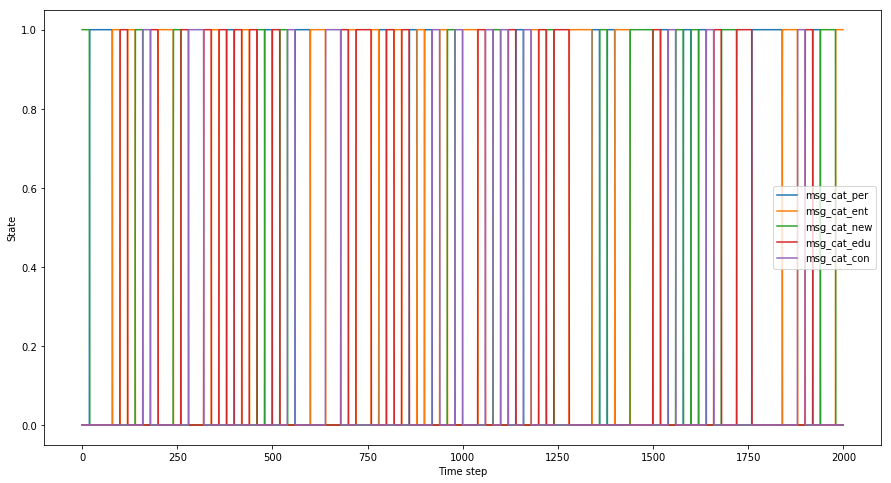

In [684]:
inputsDF[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 'msg_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

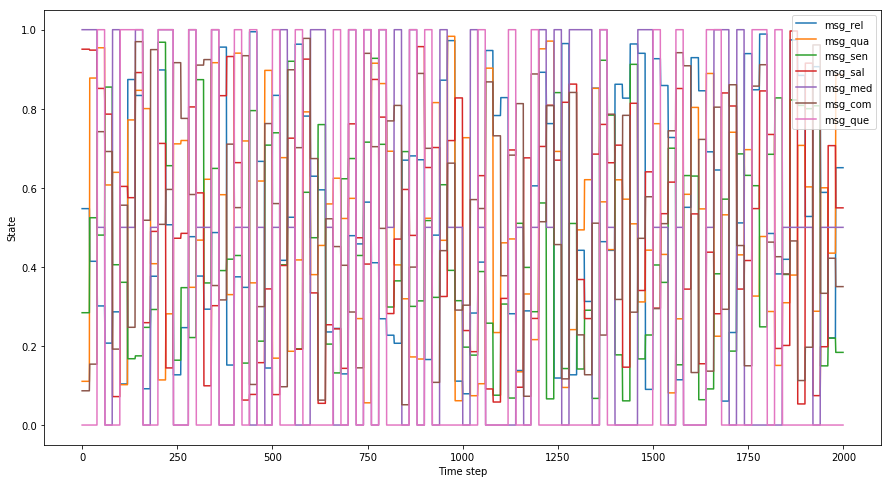

In [685]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Sensory states

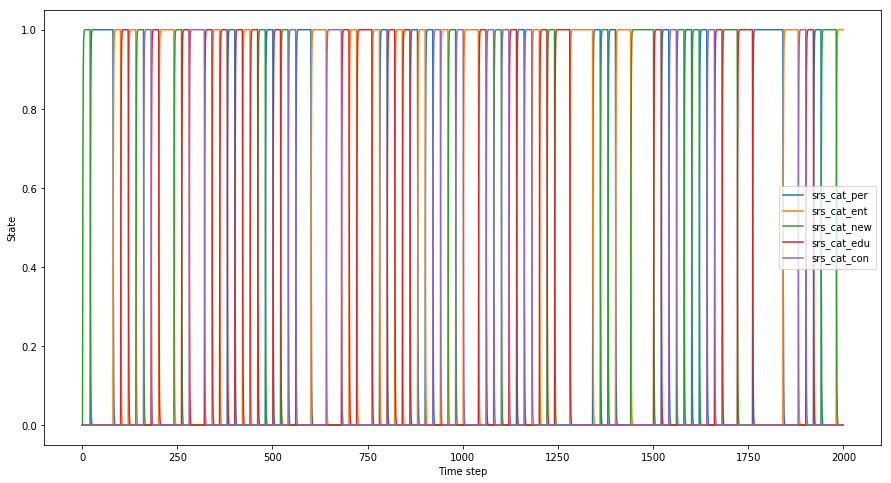

In [686]:
inputsDF[['srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu', 'srs_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

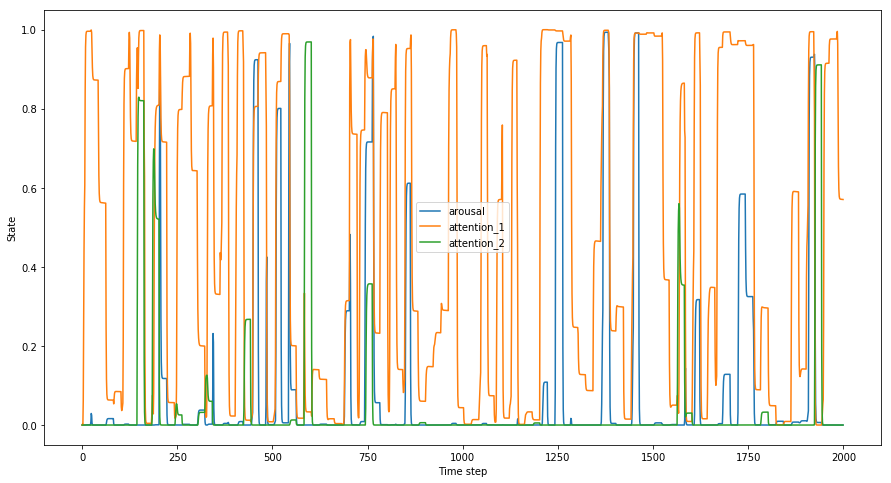

In [687]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### FFs

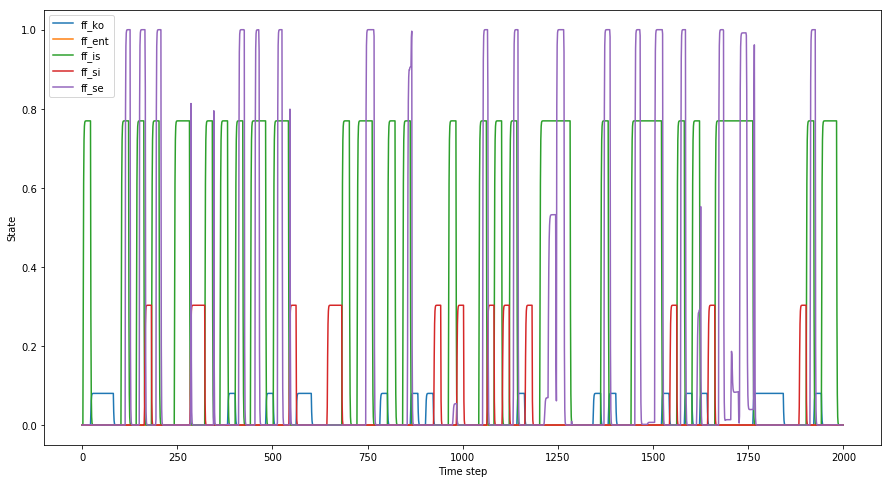

In [688]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction, dissatisfaction

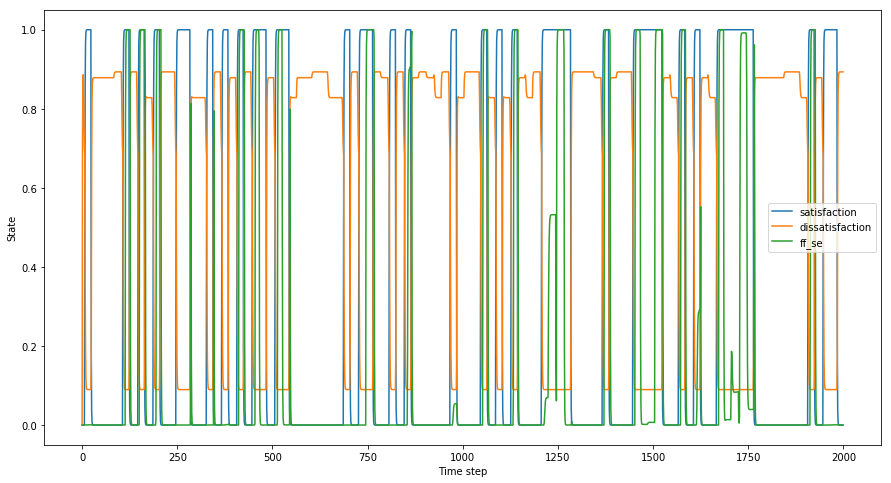

In [689]:
inputsDF[['satisfaction', 'dissatisfaction', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### preps and ssr's

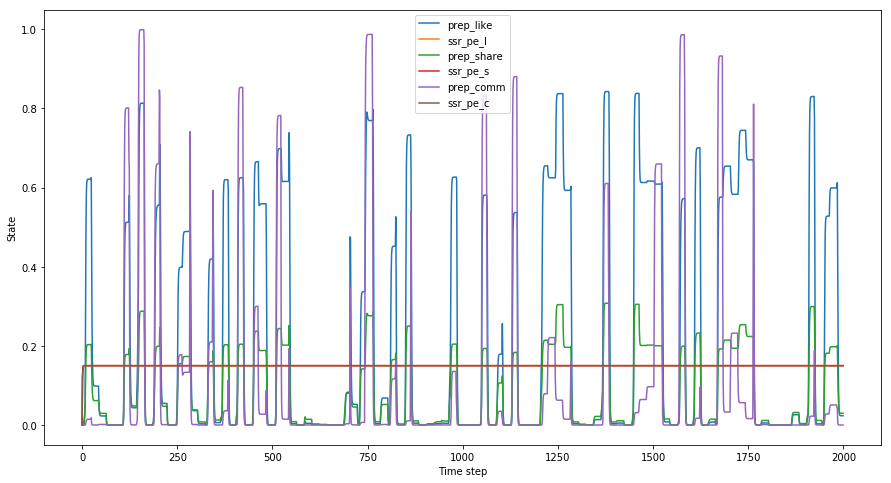

In [690]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Outputs

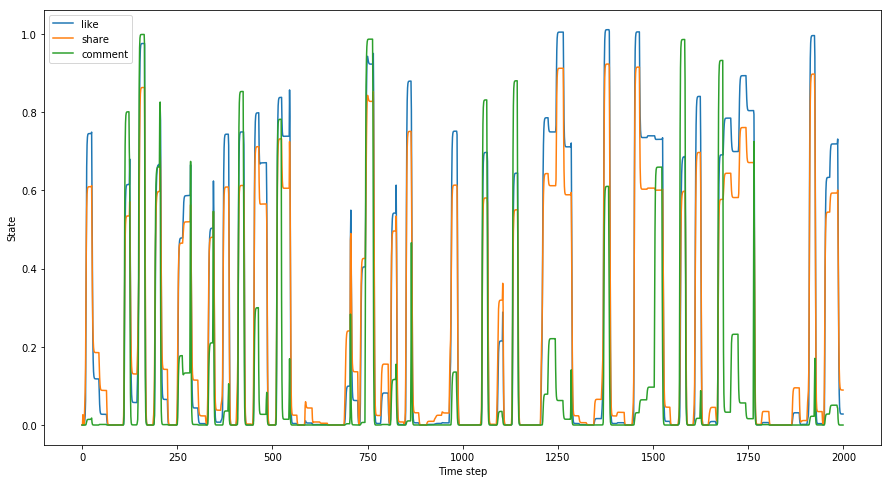

In [691]:
inputsDF[['like', 'share', 'comment']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Expected reactions

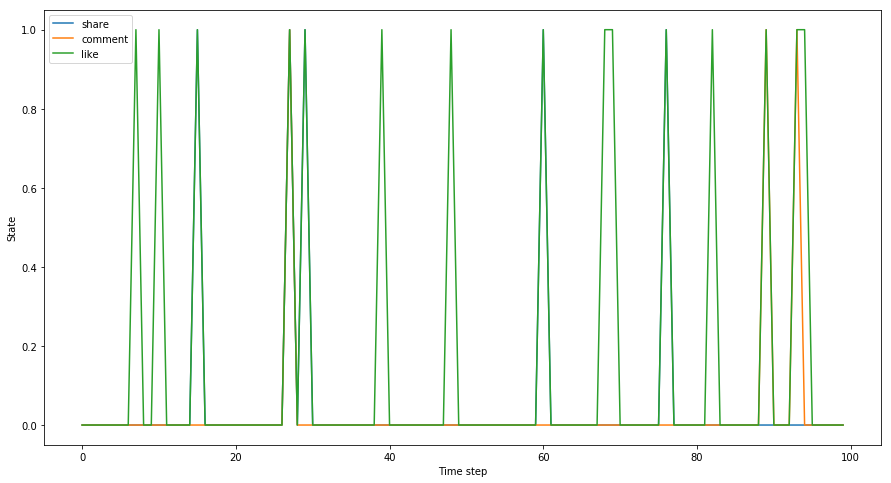

In [692]:
reactions1[['share', 'comment', 'like']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

In [693]:
inputsDF.columns

Index(['arousal', 'attention_1', 'attention_2', 'comment', 'dissatisfaction',
       'ff_ent', 'ff_is', 'ff_ko', 'ff_se', 'ff_si', 'like', 'mood',
       'msg_cat_con', 'msg_cat_edu', 'msg_cat_ent', 'msg_cat_new',
       'msg_cat_per', 'msg_com', 'msg_med', 'msg_qua', 'msg_que', 'msg_rel',
       'msg_sal', 'msg_sen', 'nf_ent', 'nf_is', 'nf_ko', 'nf_se', 'nf_si',
       'prep_comm', 'prep_like', 'prep_share', 'pt_cons', 'satisfaction',
       'share', 'srs_cat_con', 'srs_cat_edu', 'srs_cat_ent', 'srs_cat_new',
       'srs_cat_per', 'srs_com', 'srs_med', 'srs_qua', 'srs_que', 'srs_rel',
       'srs_sal', 'srs_sen', 'ss_cat_con', 'ss_cat_edu', 'ss_cat_ent',
       'ss_cat_new', 'ss_cat_per', 'ss_com', 'ss_med', 'ss_qua', 'ss_que',
       'ss_rel', 'ss_sal', 'ss_sen', 'ssr_pe_c', 'ssr_pe_l', 'ssr_pe_s'],
      dtype='object')

# Agent 2

In [694]:
inputsDF, parameters = model.run_message_sequence(messages2.values, a2_traits,parameters, 'nb3')

In [695]:
parameters

{'arousal': [0.623803916777028, 19.70782490317151],
 'attention_1': [2.2907903244810037, 3.094706988562289],
 'attention_2': [9.317378640052041, 10.37244664924314],
 'dissatisfaction': [7.480508942436295, 6.079956099533861],
 'ff_ent': [7.630142558989405, 16.5260405256732],
 'ff_is': [0.6924830987673097, 4.148139465198357],
 'ff_ko': [2.9821508331112816, 0.9606515243309363],
 'ff_se': [4.737262129534218, 12.176987203453415],
 'ff_si': [1.0437821847997477, 19.03053478161916],
 'mood': [0.8550024873505432, 8.280108680649263],
 'mood_speed': 0.00031416568348937847,
 'prep_comm': [3.6762456969019177, 4.081044439720968],
 'prep_like': [5.121471591083696, 1.1786943894603135],
 'prep_share': [6.957398344108778, 0.5136004764199799],
 'satisfaction': [7.168255368236964, 18.495718505098413],
 'srs_sal': [0.4660682821401242, 15.916400601799644]}

## Inputs

### Message Categories

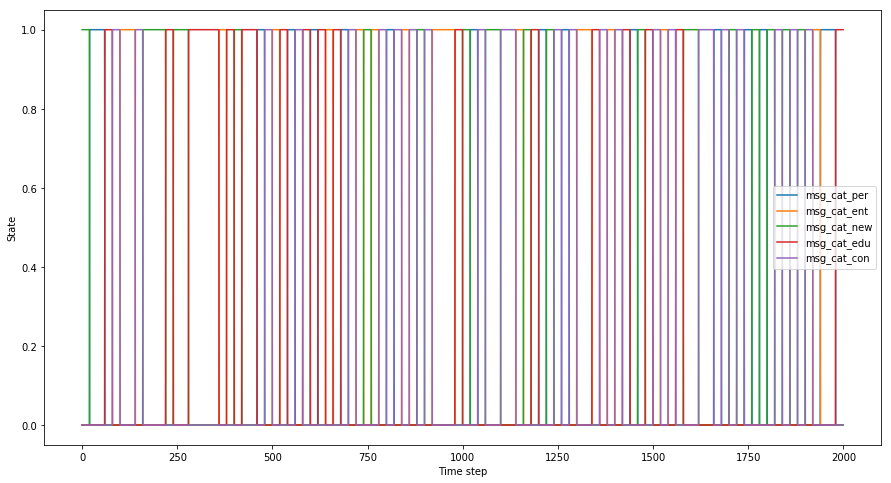

In [696]:
inputsDF[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 'msg_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

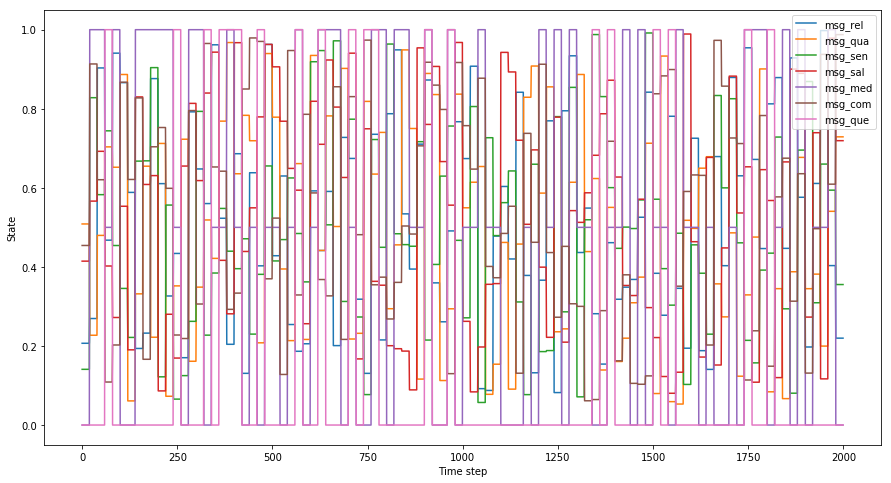

In [697]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Sensory states

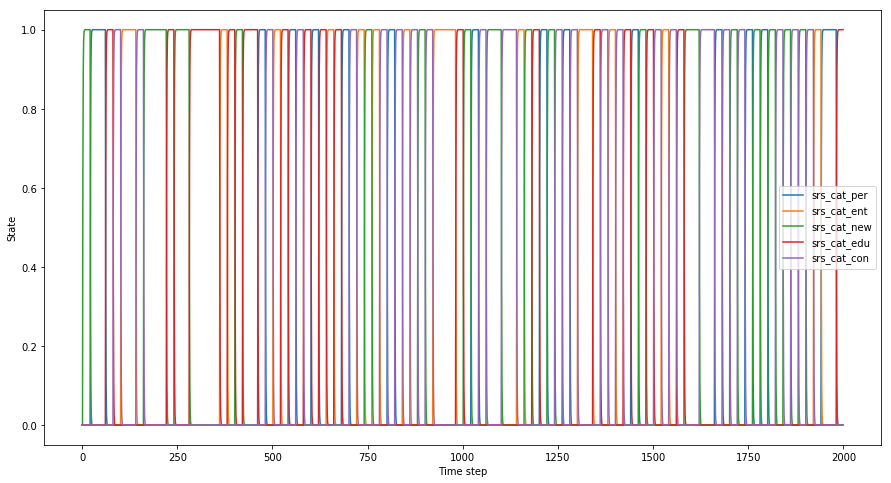

In [698]:
inputsDF[['srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu', 'srs_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

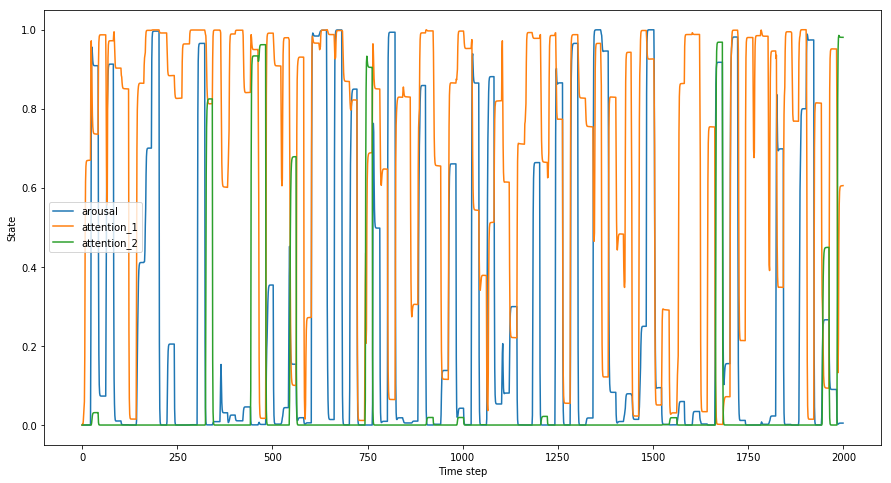

In [699]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### FFs

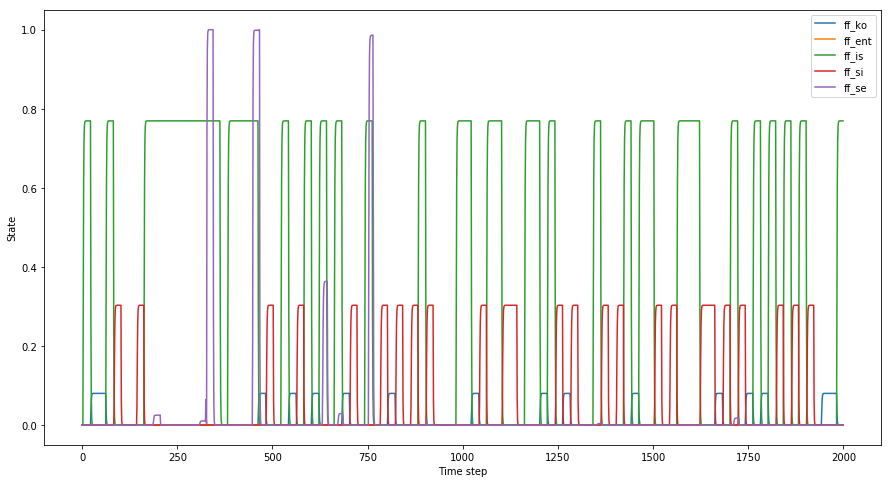

In [700]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction, dissatisfaction

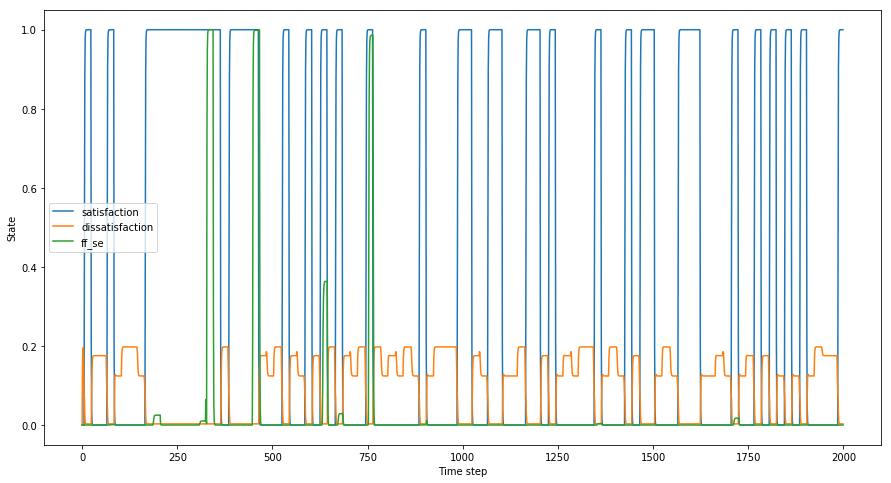

In [701]:
inputsDF[['satisfaction', 'dissatisfaction', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### preps and ssr's

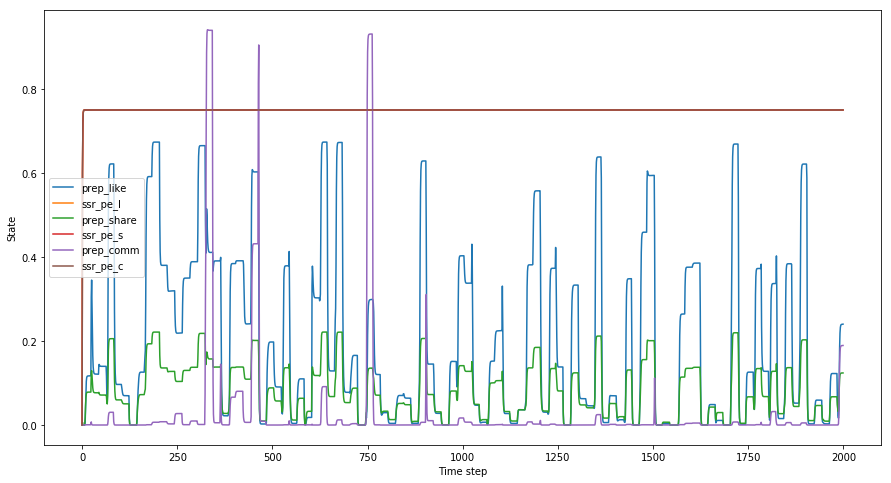

In [702]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Outputs

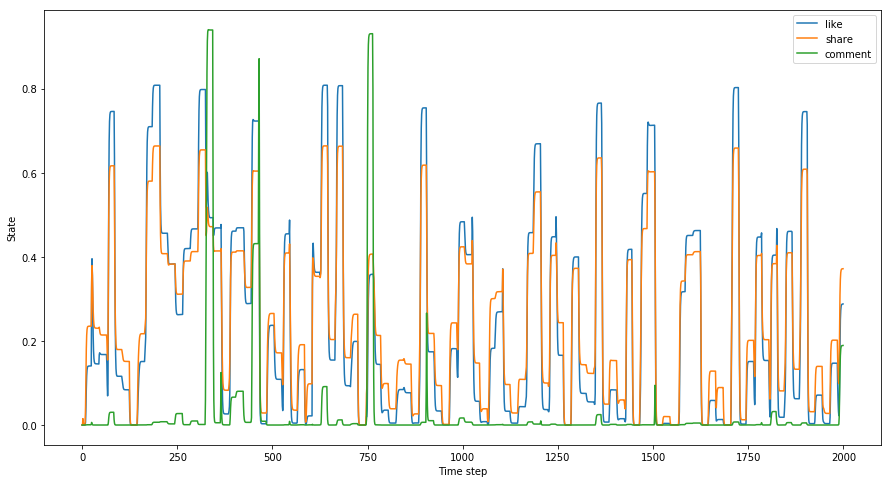

In [703]:
inputsDF[['like', 'share', 'comment']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Expected reactions

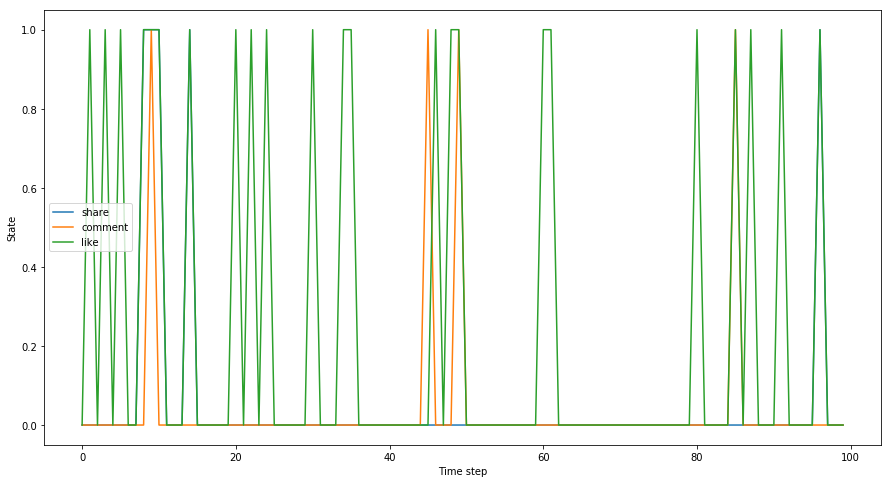

In [704]:
reactions2[['share', 'comment', 'like']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

In [705]:
inputsDF.columns

Index(['arousal', 'attention_1', 'attention_2', 'comment', 'dissatisfaction',
       'ff_ent', 'ff_is', 'ff_ko', 'ff_se', 'ff_si', 'like', 'mood',
       'msg_cat_con', 'msg_cat_edu', 'msg_cat_ent', 'msg_cat_new',
       'msg_cat_per', 'msg_com', 'msg_med', 'msg_qua', 'msg_que', 'msg_rel',
       'msg_sal', 'msg_sen', 'nf_ent', 'nf_is', 'nf_ko', 'nf_se', 'nf_si',
       'prep_comm', 'prep_like', 'prep_share', 'pt_cons', 'satisfaction',
       'share', 'srs_cat_con', 'srs_cat_edu', 'srs_cat_ent', 'srs_cat_new',
       'srs_cat_per', 'srs_com', 'srs_med', 'srs_qua', 'srs_que', 'srs_rel',
       'srs_sal', 'srs_sen', 'ss_cat_con', 'ss_cat_edu', 'ss_cat_ent',
       'ss_cat_new', 'ss_cat_per', 'ss_com', 'ss_med', 'ss_qua', 'ss_que',
       'ss_rel', 'ss_sal', 'ss_sen', 'ssr_pe_c', 'ssr_pe_l', 'ssr_pe_s'],
      dtype='object')

# Agent 3

In [706]:
inputsDF, parameters = model.run_message_sequence(messages3.values, a3_traits,parameters, 'nb3')

In [707]:
parameters

{'arousal': [0.623803916777028, 19.70782490317151],
 'attention_1': [2.2907903244810037, 3.094706988562289],
 'attention_2': [9.317378640052041, 10.37244664924314],
 'dissatisfaction': [7.480508942436295, 6.079956099533861],
 'ff_ent': [7.630142558989405, 16.5260405256732],
 'ff_is': [0.6924830987673097, 4.148139465198357],
 'ff_ko': [2.9821508331112816, 0.9606515243309363],
 'ff_se': [4.737262129534218, 12.176987203453415],
 'ff_si': [1.0437821847997477, 19.03053478161916],
 'mood': [0.8550024873505432, 8.280108680649263],
 'mood_speed': 0.00031416568348937847,
 'prep_comm': [3.6762456969019177, 4.081044439720968],
 'prep_like': [5.121471591083696, 1.1786943894603135],
 'prep_share': [6.957398344108778, 0.5136004764199799],
 'satisfaction': [7.168255368236964, 18.495718505098413],
 'srs_sal': [0.4660682821401242, 15.916400601799644]}

## Inputs

### Message Categories

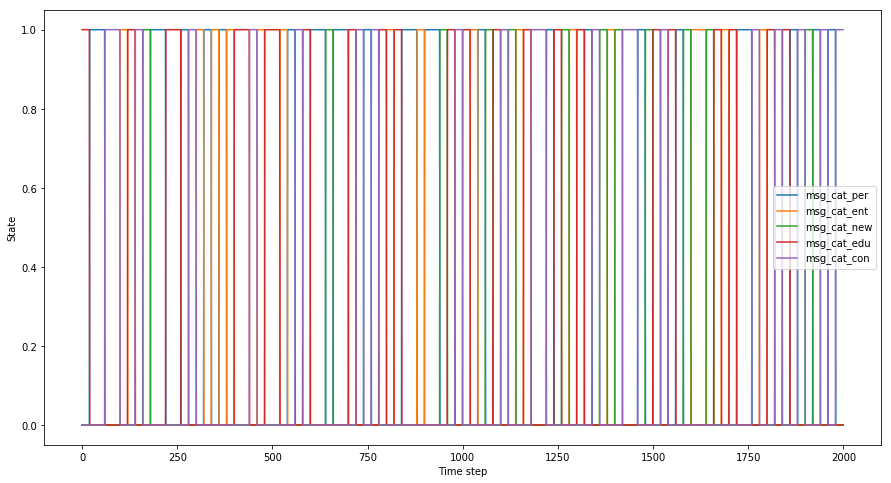

In [708]:
inputsDF[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 'msg_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

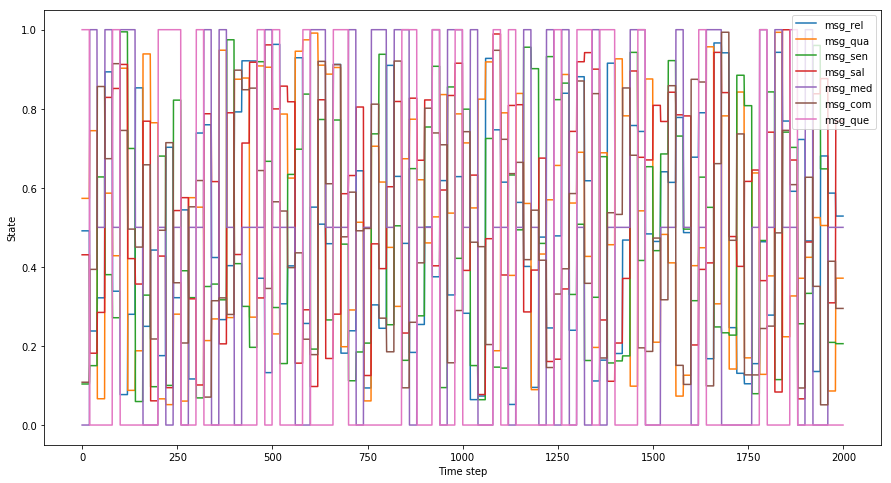

In [709]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Sensory states

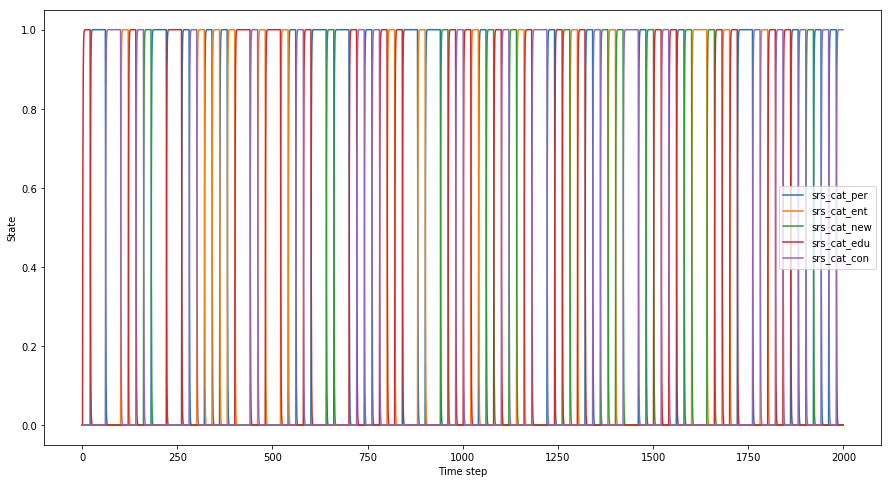

In [710]:
inputsDF[['srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu', 'srs_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

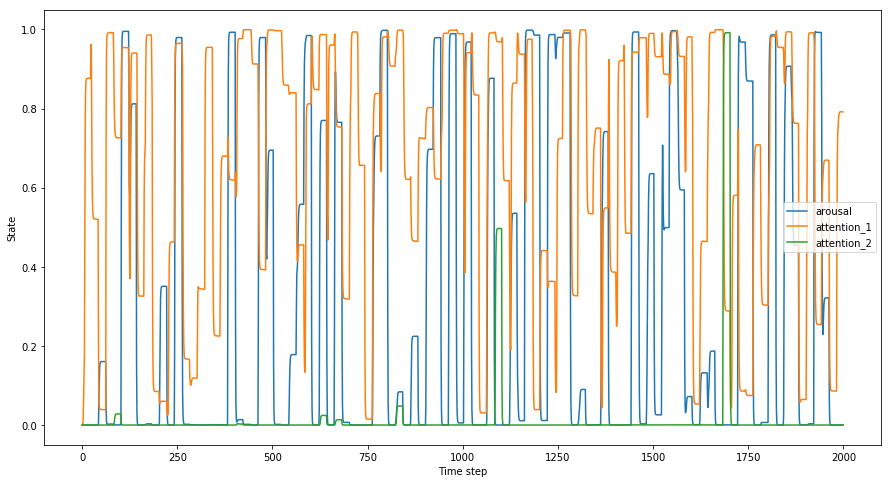

In [711]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### FFs

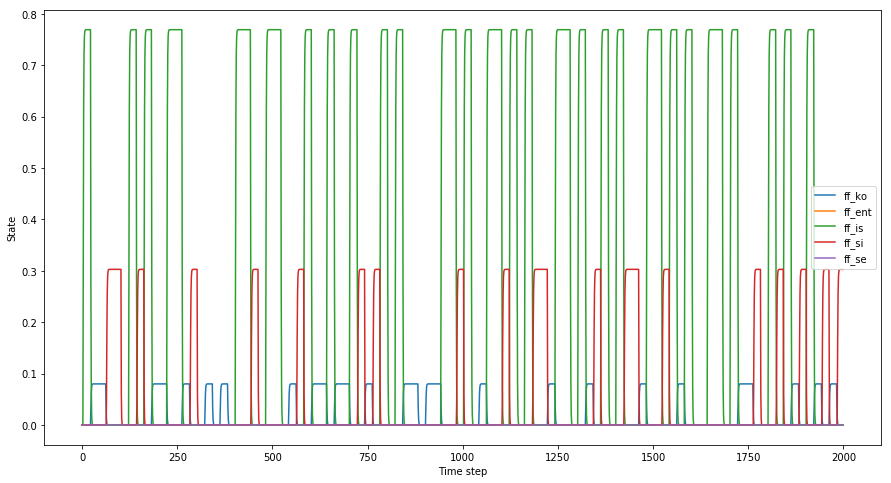

In [712]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction, dissatisfaction

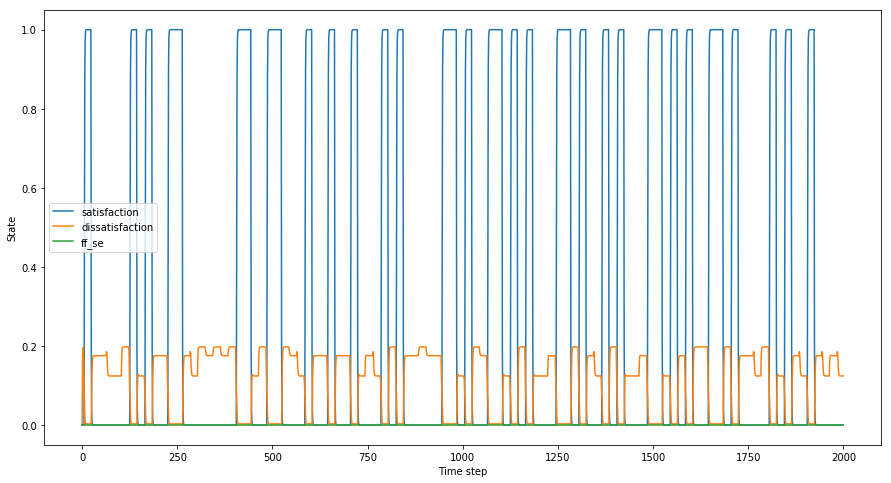

In [713]:
inputsDF[['satisfaction', 'dissatisfaction', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### preps and ssr's

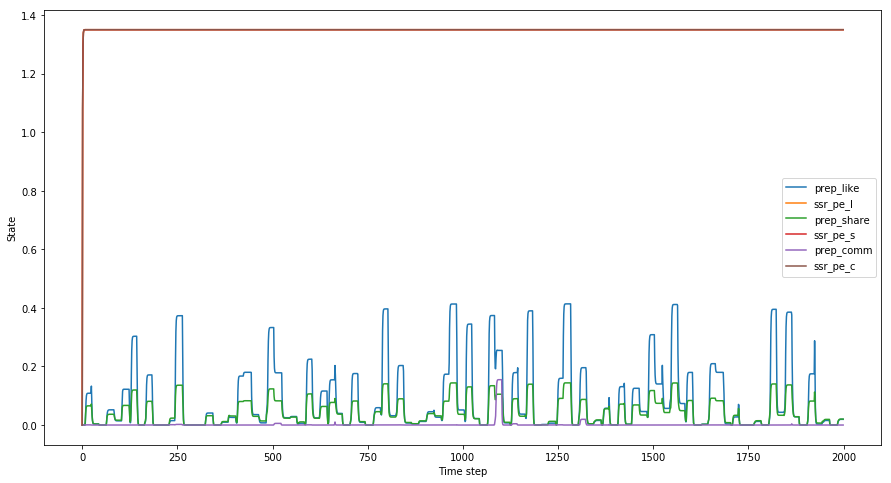

In [714]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Outputs

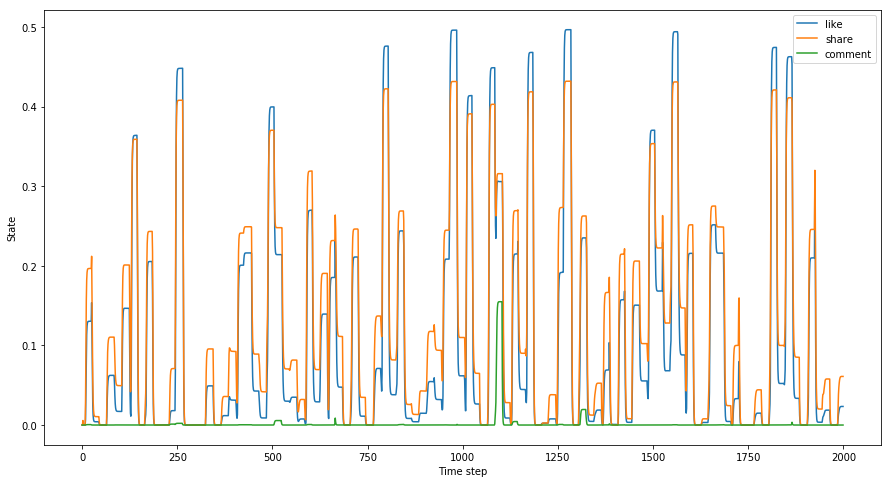

In [715]:
inputsDF[['like', 'share', 'comment']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Expected reactions

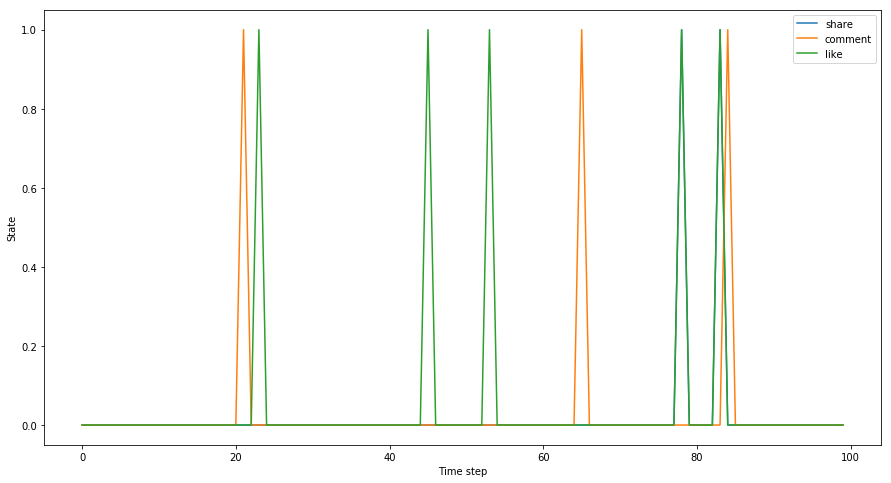

In [716]:
reactions3[['share', 'comment', 'like']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

In [717]:
inputsDF.columns

Index(['arousal', 'attention_1', 'attention_2', 'comment', 'dissatisfaction',
       'ff_ent', 'ff_is', 'ff_ko', 'ff_se', 'ff_si', 'like', 'mood',
       'msg_cat_con', 'msg_cat_edu', 'msg_cat_ent', 'msg_cat_new',
       'msg_cat_per', 'msg_com', 'msg_med', 'msg_qua', 'msg_que', 'msg_rel',
       'msg_sal', 'msg_sen', 'nf_ent', 'nf_is', 'nf_ko', 'nf_se', 'nf_si',
       'prep_comm', 'prep_like', 'prep_share', 'pt_cons', 'satisfaction',
       'share', 'srs_cat_con', 'srs_cat_edu', 'srs_cat_ent', 'srs_cat_new',
       'srs_cat_per', 'srs_com', 'srs_med', 'srs_qua', 'srs_que', 'srs_rel',
       'srs_sal', 'srs_sen', 'ss_cat_con', 'ss_cat_edu', 'ss_cat_ent',
       'ss_cat_new', 'ss_cat_per', 'ss_com', 'ss_med', 'ss_qua', 'ss_que',
       'ss_rel', 'ss_sal', 'ss_sen', 'ssr_pe_c', 'ssr_pe_l', 'ssr_pe_s'],
      dtype='object')